In [72]:
import numpy as np
import pandas as pd

In [73]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [74]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [75]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [76]:
#dropping the missing values in the rows
df.dropna(inplace=True)

In [77]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [78]:
df.shape

(714, 3)

In [79]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [81]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [82]:
X_test.head()

,Age,Fare
149,42.0,13.00
407,3.0,18.75
53,29.0,26.00
369,24.0,69.30
818,43.0,6.45


In [ ]:
y_train.head()

328    1
73     0
253    0
719    0
666    0
Name: Survived, dtype: int64

In [ ]:
clf=DecisionTreeClassifier()

In [ ]:
clf.fit(X_train,y_train)
predict=clf.predict(X_test)

In [ ]:
accuracy_score(y_test,predict)*100

62.93706293706294

In [ ]:
k1=np.mean(cross_val_score(DecisionTreeClassifier(),X,y,scoring='accuracy',cv=10))

In [ ]:
k1*100

63.44874804381846

In [ ]:
kbin_age=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [ ]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [ ]:
X_train_trf=trf.fit_transform(X_train)

In [ ]:
X_test_trf=trf.transform(X_test)

In [ ]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=10),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=10)}

In [ ]:
trf.named_transformers_['first']

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [ ]:
trf.named_transformers_['second']

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [ ]:
trf.named_transformers_['first'].n_bins_

array([10])

In [ ]:
trf.named_transformers_['second'].n_bins_

array([10])

In [ ]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [ ]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.75  ,   7.8958,   9.225 ,  13.    ,  15.75  ,
               26.    ,  29.125 ,  51.4792,  82.1708, 512.3292])         ],
      dtype=object)

In [ ]:
output=pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare': X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [ ]:
output.head()

,age,age_trf,fare,fare_trf
328,31.0,5.0,20.5250,5.0
73,26.0,4.0,14.4542,4.0
253,30.0,5.0,16.1000,5.0
719,33.0,6.0,7.7750,1.0
666,25.0,4.0,13.0000,4.0


In [ ]:
output['age_labels']=pd.cut(x=X_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())

In [84]:
output['fare_labels']=pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [85]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
105,28.0,4.0,7.8958,2.0,"(25.0, 28.5]","(7.75, 7.896]"
506,33.0,6.0,26.0000,6.0,"(32.0, 36.0]","(15.75, 26.0]"
122,32.5,6.0,30.0708,7.0,"(32.0, 36.0]","(29.125, 51.479]"
57,28.5,5.0,7.2292,0.0,"(25.0, 28.5]","(0.0, 7.75]"
493,71.0,9.0,49.5042,7.0,"(50.0, 80.0]","(29.125, 51.479]"


In [89]:
clf=DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2=clf.predict(X_test_trf)
accuracy_score(y_test,y_pred2)*100

62.23776223776224

In [99]:
X_trf=trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')*100)

63.87128325508608

In [105]:
def discretize(bins,strategy):
  kbin_age=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
  kbin_fare=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

  trf=ColumnTransformer([
      ('first',kbin_age,[0]),
      ('second',kbin_fare,[1])
  ])

  X_trf=trf.fit_transform(X)
  print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,scoring='accuracy',cv=10)))
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  plt.hist(X['Age'])
  plt.title('Before')

  plt.subplot(122)
  plt.hist(X_trf[:,1],color='red')
  plt.title("After")
  plt.show()

0.6345266040688575


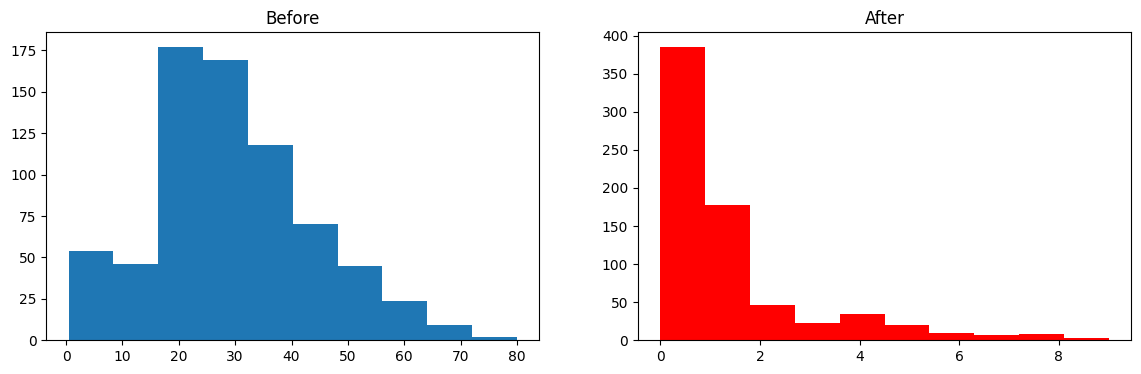

In [108]:
discretize(10,'kmeans')